In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use(["seaborn-white", "seaborn-poster"])
%matplotlib inline 

# ! ls /Users/rliaw/Research/riselab/sosp2019/scripts/ablations/test_job_limit_ablation.csv

# Job Limit Ablations

We can effectively limit the number of jobs while improving performance.

In [598]:
job_limit = pd.read_csv("/Users/rliaw/Research/riselab/sosp2019/scripts/ablations/test_job_limit_ablation.csv")
job_limit.best = -job_limit.best 

In [599]:
small_jobs = job_limit.where(job_limit["num_jobs"] == 8).dropna()
big_jobs = job_limit.where(job_limit["num_jobs"] == 200).dropna()
limit_jobs = job_limit.where(job_limit["_no_job_limit"] == False).dropna()

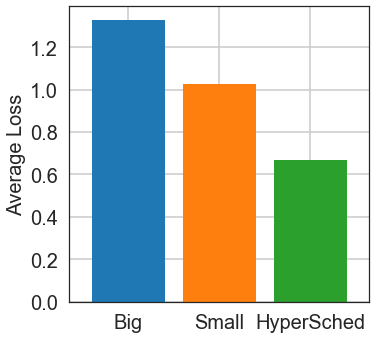

In [600]:
df = pd.DataFrame(zip(["Big", "Small",  "HyperSched"], [big_jobs.best.mean(),small_jobs.best.mean(), limit_jobs.best.mean()]), columns=["Setup", "Loss"])
df.index = df["Setup"]

ax = df["Loss"].plot(kind='bar',  colors=['C0', 'C1', 'C2'], rot=0 ,grid=True, fontsize=20, width=0.8)
plt.xlabel("", fontsize=20)
# plt.axis('tight')
plt.tight_layout()
ax.figure.set_size_inches(5,5)
plt.ylabel("Average Loss", fontsize=20)

plt.savefig("job-limit-loss.pdf", bbox_inches='tight')


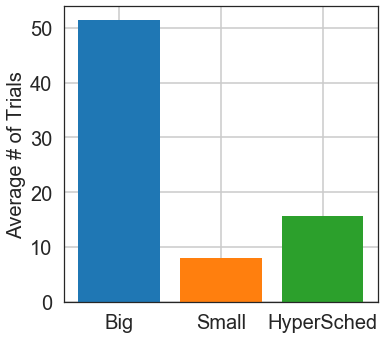

In [601]:
df = pd.DataFrame(zip(["Big", "Small",  "HyperSched"], [big_jobs.num_trials.mean(),small_jobs.num_trials.mean(), limit_jobs.num_trials.mean()]), columns=["Setup", "num_trials"])
df.index = df["Setup"]

ax = df["num_trials"].plot(kind='bar',  colors=['C0', 'C1', 'C2'], rot=0 ,grid=True, fontsize=20, width=0.8)
plt.xlabel("", fontsize=20)
plt.axis('tight')
plt.tight_layout()
ax.figure.set_size_inches(5,5)
plt.ylabel("Average # of Trials", fontsize=20)

plt.savefig("job-limit-num-trials.pdf",bbox_inches='tight')

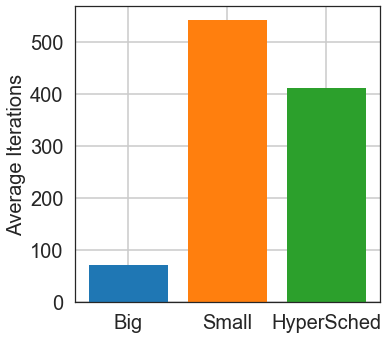

In [602]:
df = pd.DataFrame(zip(["Big", "Small",  "HyperSched"], [big_jobs.best_iter.mean(),small_jobs.best_iter.mean(), limit_jobs.best_iter.mean()]), columns=["Setup", "Iterations"])
df.index = df["Setup"]

ax = df["Iterations"].plot(kind='bar',  colors=['C0', 'C1', 'C2'], rot=0 ,grid=True, fontsize=20, width=0.8)
plt.xlabel("", fontsize=20)
plt.axis('tight')
plt.tight_layout()
ax.figure.set_size_inches(5,5)
plt.ylabel("Average Iterations", fontsize=20)

plt.savefig("job-limit-iterations.pdf", bbox_inches='tight')

# Retrospective Killing

In [578]:
retro = pd.read_csv("/Users/rliaw/Research/riselab/sosp2019/scripts/ablations/test_retro.csv")
retro.best = -retro.best


def get_height_error(group, column):
    mean = group["mean"][column].unstack(0)
    mean.columns = ["Retrospective", "No Retrospective"]
    std = group["var"][column].map(lambda s: np.sqrt(s)).unstack(0)
    std.columns = ["Retrospective", "No Retrospective"]

    mean = mean[["No Retrospective", "Retrospective"]]
    std = std[["No Retrospective", "Retrospective"]]
    return mean, std

In [579]:
group_vals["mean"]

grace_period   max_t  _ignore_overhead  \
_no_retro deadline num_atoms                                           
False     10       4                   5.0  5000.0              True   
                   16                  5.0  5000.0              True   
          20       4                   5.0  5000.0              True   
                   16                  5.0  5000.0              True   
True      10       4                   5.0  5000.0              True   
                   16                  5.0  5000.0              True   
          20       4                   5.0  5000.0              True   
                   16                  5.0  5000.0              True   

                              _no_job_limit  _assume_linear  seed  num_jobs  \
_no_retro deadline num_atoms                                                  
False     10       4                   True            True   3.0     200.0   
                   16                  True            True   3.0     200.0   
          20       4                   True            True   3.0     200.0   
                   16                  True            True   3.0     200.0   
True      10       4                   True            True   3.0     200.0   
                   16                  True            True   3.0     200.0   
          20       4                   True            True   3.0     200.0   
                   16                  True            True   3.0     200.0   

                              delay  startup_delay  num_trials      best  \
_no_retro deadline num_atoms                                               
False     10       4            0.1          0.001        24.4  1.371198   
                   16           0.1          0.001       101.2  1.280491   
          20       4            0.1          0.001        45.6  1.051449   
                   16           0.1          0.001       192.8  0.908079   
True      10       4            0.1          0.001        14.0  1.358566   
                   16           0.1          0.001        84.6  1.277008   
          20       4            0.1          0.001        18.6  1.098821   
                   16           0.1          0.001       165.0  0.922453   

                              best_iter    avg_len  median_len  top_10_len  \
_no_retro deadline num_atoms                                                 
False     10       4               58.4  11.048615         5.0       23.42   
                   16              66.8   9.344085         5.0       20.00   
          20       4              155.8  13.518348         5.0       23.36   
                   16             143.8  11.608286         5.0       20.00   
True      10       4               58.8  22.949084         5.0       67.42   
                   16              67.8  12.179370         5.0       22.10   
          20       4              165.0  55.583502        51.1      109.32   
                   16             141.2  14.623382         5.0       20.00   

                              bottom_10_len  
_no_retro deadline num_atoms                 
False     10       4                   4.76  
                   16                  5.00  
          20       4                   5.00  
                   16                  5.00  
True      10       4                   5.00  
                   16                  5.00  
          20       4                   5.00  
                   16                  5.00

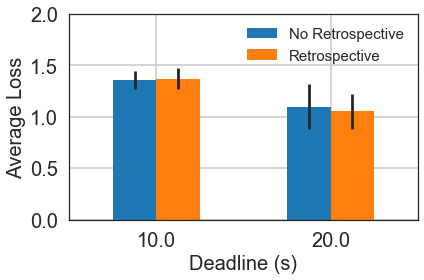

In [592]:
# small_retro = retro
# grouped = small_retro.groupby([ "_no_retro", "deadline",]).best.mean().unstack(0)
# grouped.columns = ["Retrospective", "No Retrospective"]
# grouped = grouped[["No Retrospective", "Retrospective"]]

retro_group = retro.where(retro["num_atoms"] == 4).groupby([ "_no_retro", "deadline"])
group_vals = {"mean": retro_group.mean(), "var": retro_group.var()}
mean, std = get_height_error(group_vals, "best")
mean.plot.bar(rot=0, yerr=std, grid=True, fontsize=20)
plt.ylim([0, 2])
plt.legend(fontsize=15)
plt.xlabel("Deadline (s)", fontsize=20)
plt.ylabel("Average Loss", fontsize=20)
plt.tight_layout()

plt.savefig("retro-4-loss.pdf")

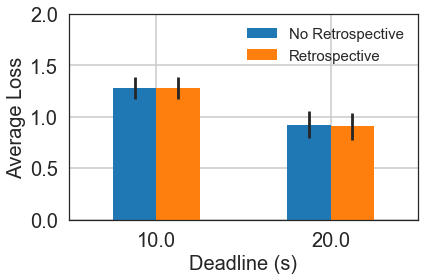

In [593]:

retro_group = retro.where(retro["num_atoms"] == 16).groupby([ "_no_retro", "deadline"])
group_vals = {"mean": retro_group.mean(), "var": retro_group.var()}
mean, std = get_height_error(group_vals, "best")
mean.plot.bar(rot=0, yerr=std, grid=True, fontsize=20)
plt.ylim([0, 2])
plt.legend(fontsize=15)
plt.xlabel("Deadline (s)", fontsize=20)
plt.ylabel("Average Loss", fontsize=20)
plt.tight_layout()

plt.savefig("retro-16-loss.pdf")

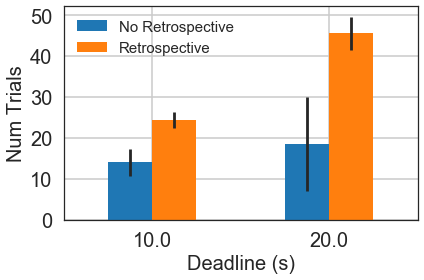

In [594]:

retro_group = retro.where(retro["num_atoms"] == 4).groupby([ "_no_retro", "deadline"])
group_vals = {"mean": retro_group.mean(), "var": retro_group.var()}
mean, std = get_height_error(group_vals, "num_trials")
mean.plot.bar(rot=0, yerr=std, grid=True, fontsize=20)
plt.xlabel("Deadline (s)", fontsize=20)
plt.ylabel("Num Trials", fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()

# plt.gr
plt.savefig("retro-4-numtrials.pdf")
# plt.title("Num Trials")

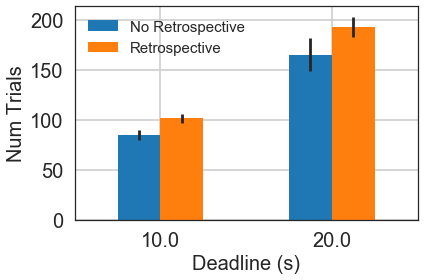

In [595]:

retro_group = retro.where(retro["num_atoms"] == 16).groupby([ "_no_retro", "deadline"])
group_vals = {"mean": retro_group.mean(), "var": retro_group.var()}
mean, std = get_height_error(group_vals, "num_trials")
mean.plot.bar(rot=0, yerr=std, grid=True, fontsize=20)
plt.xlabel("Deadline (s)", fontsize=20)
plt.ylabel("Num Trials", fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()

plt.savefig("retro-16-numtrials.pdf")
# plt.title("Num Trials")

# If you account for overhead

In [659]:
overhead = pd.read_csv("/Users/rliaw/Research/riselab/sosp2019/scripts/ablations/test_bad_scaling_with_overhead.csv")
overhead.best = -overhead.best
overhead["Ignore Overhead"] = overhead["_ignore_overhead"]

In [712]:
grouped_overhead = overhead.groupby(["Ignore Overhead", "scaling", "startup_delay"])
overhead_mean = grouped_overhead.mean()
overhead_var = grouped_overhead.var()

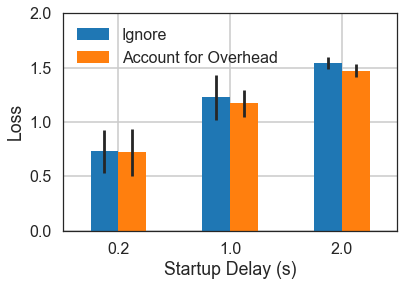

In [719]:
c = overhead_mean.unstack(1).best.unstack(0)["LINEAR"]
c.columns = ["Account for Overhead", "Ignore"]
c = c[["Ignore", "Account for Overhead"]]

d = overhead_var.best.map(lambda s: np.sqrt(s)).unstack(1)["LINEAR"].unstack(0)
d.columns = ["Account for Overhead", "Ignore"]
d = d[["Ignore", "Account for Overhead"]]

c.plot.bar(yerr=d, rot=0, grid=True)
plt.ylim([0, 2])
plt.ylabel("Loss")
plt.xlabel("Startup Delay (s)")
plt.savefig("ignore-overhead-loss-linear.pdf", bbox_inches='tight')

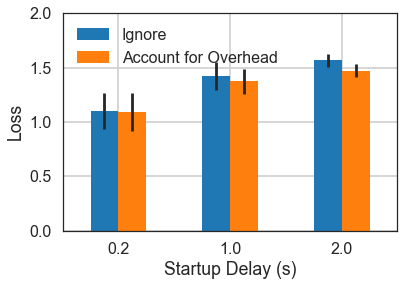

In [720]:
c = overhead_mean.unstack(1).best.unstack(0)["SQRT"]
c.columns = ["Account for Overhead", "Ignore"]
c = c[["Ignore", "Account for Overhead"]]

d = overhead_var.best.map(lambda s: np.sqrt(s)).unstack(1)["SQRT"].unstack(0)
d.columns = ["Account for Overhead", "Ignore"]
d = d[["Ignore", "Account for Overhead"]]

c.plot.bar(yerr=d, rot=0, grid=True)
plt.ylim([0, 2])
plt.ylabel("Loss")
plt.xlabel("Startup Delay (s)")
plt.savefig("ignore-overhead-loss-sqrt.pdf", bbox_inches='tight')

# Overhead Sensitivity

In [645]:
osense = pd.read_csv("/Users/rliaw/Research/riselab/sosp2019/scripts/ablations/test_overhead_sensitivity.csv")
osense.best = -osense.best

In [646]:
osense_mean = osense.groupby(["startup_delay",  "scaling", ]).mean()

In [647]:
osense_mean

deadline  grace_period   max_t  _no_retro  \
startup_delay scaling                                              
0.2           LINEAR       10.0           5.0  5000.0      False   
              NONE         10.0           5.0  5000.0      False   
              SQRT         10.0           5.0  5000.0      False   
1.0           LINEAR       10.0           5.0  5000.0      False   
              NONE         10.0           5.0  5000.0      False   
              SQRT         10.0           5.0  5000.0      False   
2.0           LINEAR       10.0           5.0  5000.0      False   
              NONE         10.0           5.0  5000.0      False   
              SQRT         10.0           5.0  5000.0      False   

                       _ignore_overhead  _no_job_limit  _assume_linear  seed  \
startup_delay scaling                                                          
0.2           LINEAR              False          False           False   3.0   
              NONE                False          False           False   3.0   
              SQRT                False          False           False   3.0   
1.0           LINEAR              False          False           False   3.0   
              NONE                False          False           False   3.0   
              SQRT                False          False           False   3.0   
2.0           LINEAR              False          False           False   3.0   
              NONE                False          False           False   3.0   
              SQRT                False          False           False   3.0   

                       num_atoms  num_jobs  delay  num_trials      best  \
startup_delay scaling                                                     
0.2           LINEAR         8.0     100.0    0.1        14.2  0.696066   
              NONE           8.0     100.0    0.1        14.2  1.330424   
              SQRT           8.0     100.0    0.1        14.0  1.089884   
1.0           LINEAR         8.0     100.0    0.1        15.0  1.212153   
              NONE           8.0     100.0    0.1        15.0  1.393505   
              SQRT           8.0     100.0    0.1        15.0  1.382345   
2.0           LINEAR         8.0     100.0    0.1        15.0  1.468862   
              NONE           8.0     100.0    0.1        15.0  1.471141   
              SQRT           8.0     100.0    0.1        15.0  1.469267   

                       best_iter    avg_len  median_len  top_10_len  \
startup_delay scaling                                                 
0.2           LINEAR       380.8  35.140952         5.1       27.24   
              NONE          69.4  13.298095         5.3       27.08   
              SQRT         140.8  18.828571         5.3       28.98   
1.0           LINEAR       101.4  15.720000         5.0       30.28   
              NONE          55.4  13.186667         5.2       33.64   
              SQRT          57.4  12.960000         5.2       31.00   
2.0           LINEAR        41.4  11.946667         5.2       26.36   
              NONE          41.2  12.186667         5.0       26.24   
              SQRT          41.4  12.066667         5.4       25.48   

                       bottom_10_len  
startup_delay scaling                 
0.2           LINEAR             5.0  
              NONE               5.0  
              SQRT               5.0  
1.0           LINEAR             5.0  
              NONE               5.0  
              SQRT               5.0  
2.0           LINEAR             5.0  
              NONE               5.0  
              SQRT               5.0

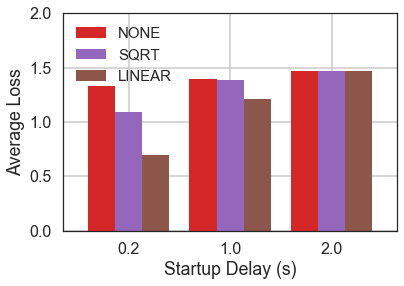

In [650]:
reorder = osense_mean.best.unstack(0)
reorder = reorder[[0.2, 1.0, 2.0]]
reorder
reorder.T[["NONE", "SQRT", "LINEAR"]].plot.bar(rot=0,colors=["C3", "C4", "C5"], grid=True, width=0.8)
plt.ylim([0, 2])
plt.ylabel("Average Loss")
plt.xlabel("Startup Delay (s)")
plt.legend(fontsize=15)
plt.savefig("./overhead-sensitivity-loss.pdf", bbox_inches='tight')

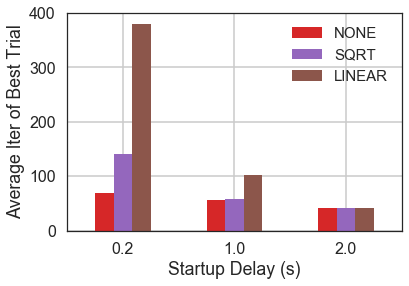

In [715]:
reorder = osense_mean.best_iter.unstack(0)
reorder = reorder[[0.2, 1.0, 2.0]]
reorder
reorder.T[["NONE", "SQRT", "LINEAR"]].plot.bar(rot=0, colors=["C3", "C4", "C5"], grid=True)
# plt.ylim([0, 2])
plt.ylabel("Average Iter of Best Trial")
plt.xlabel("Startup Delay (s)")
plt.legend(fontsize=15)
plt.savefig("./overhead-sensitivity-iter.pdf",bbox_inches='tight')

# Benefits of Dynamic Resource Allocation

In [721]:
dra = pd.read_csv("/Users/rliaw/Research/riselab/sosp2019/scripts/ablations/test_dra.csv")
dra.best = -dra.best

In [722]:
dra = dra.where(dra["num_atoms"] < 16).dropna()
dra_group = dra.groupby([ "num_atoms", "scaling"])
group_vals = {"mean": dra_group.mean(), "std": dra_group.std()}

def get_height_error(group, column):
    mean = group["mean"][column].unstack(0)
    mean.columns = mean.columns.map(int)
    std = group["std"][column].unstack(0)
    std.columns = std.columns.map(int)
    mean = mean.T[["NONE", "SQRT", "LINEAR"]]
    std =std.T[["NONE", "SQRT", "LINEAR"]]
    return mean, std


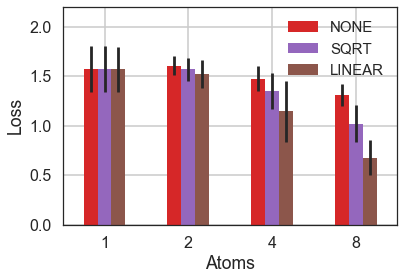

In [723]:
bestmean, beststd = get_height_error(group_vals, "best")
bestmean.plot.bar(rot=0,colors=["C3", "C4", "C5"],  yerr=beststd,grid=True)
plt.ylim([0, 2.2])
plt.ylabel("Loss")
plt.xlabel("Atoms")
plt.legend(fontsize=15)
plt.savefig("./dra-loss.pdf", bbox_inches='tight')

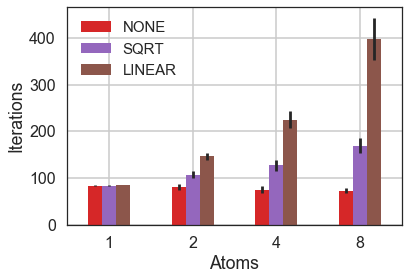

In [726]:
itermean, iterstd = get_height_error(group_vals, "best_iter")
itermean.plot.bar(rot=0,colors=["C3", "C4", "C5"],  yerr=iterstd,grid=True)
plt.ylabel("Iterations")
plt.xlabel("Atoms")
plt.legend(fontsize=15)
plt.savefig("./dra-iter.pdf", bbox_inches='tight')

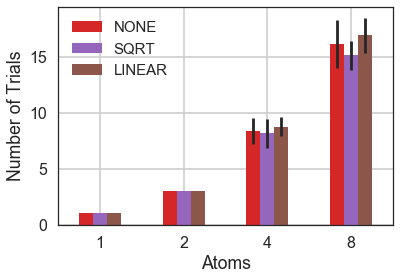

In [725]:
trialmean, trialstd = get_height_error(group_vals, "num_trials")
trialmean.plot.bar(rot=0,colors=["C3", "C4", "C5"],  yerr=trialstd,grid=True)
# plt.ylim([0, 2])
plt.ylabel("Number of Trials")
plt.xlabel("Atoms")
plt.legend(fontsize=15)
plt.savefig("./dra-trials.pdf", bbox_inches='tight')